# **Module**: Univariate Statistical Process Monitoring
## **Lecture**: Shewhart Control Chart
### *Topic*:  Shewhart Control Chart with 0.5 X sigma drift in mean 

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

In [2]:
# ==================================================================================
#                        Generate fault-free samples
# ==================================================================================

> ##### we will start with generating some fault-free samples to represent the model-training dataset

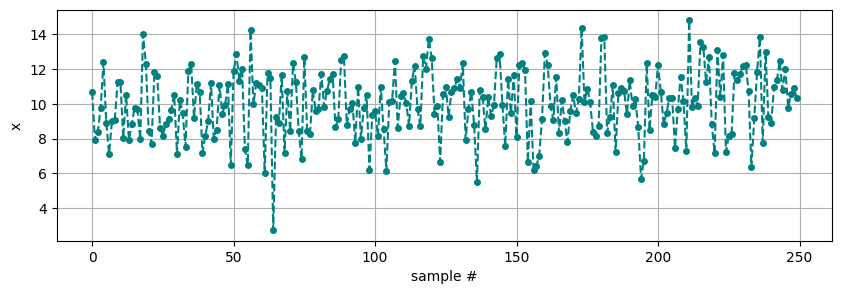

In [3]:
# generate NOC (normal operation condition) data
N = 250 # 250 observation samples
x_faultFree = np.random.normal(loc=10, scale=2, size=N) # mean=10; standard deviation=2

# plot NOC data
plt.figure(figsize=(10,3))
plt.plot(x_faultFree,'--', marker='o', markersize=4, color='teal')
plt.xlabel('sample #'), plt.ylabel('x')
plt.grid()
plt.show()


In [4]:
# ==================================================================================
#                                    Model Training
# ==================================================================================

> ##### we will use the NOC data to estimate the Shewhart control chart parameters, which are the mean (mu) and standard deviation (sigma) of the signal

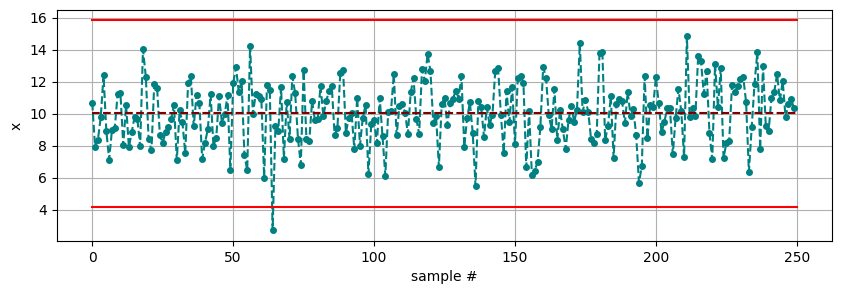

In [5]:
# estimate Shewhart model parameters and plot control chart for NOC data
mu, sigma = np.mean(x_faultFree), np.std(x_faultFree)
UCL, LCL = mu + 3*sigma, mu - 3*sigma

plt.figure(figsize=(10,3))
plt.plot(x_faultFree,'--', marker='o', markersize=4, color='teal')
plt.plot([0,N], [UCL,UCL], color='red'), plt.plot([0,N],[LCL,LCL], color='red')
plt.plot([0,N], [mu,mu], '--', color='maroon')
plt.xlabel('sample #'), plt.ylabel('x')
plt.grid()
plt.show()

In [6]:
# ==================================================================================
#               Generate faulty samples and plot on control chart
# ==================================================================================

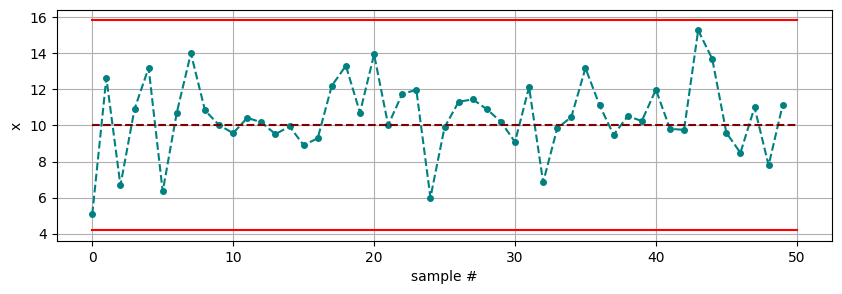

In [7]:
# faulty data
N_faulty = 50 # 50 observation samples
x_faulty = np.random.normal(loc=11, scale=2, size=N_faulty) # mean=10+0.5*2; standard deviation=2

# control chart for faulty data
plt.figure(figsize=(10,3))
plt.plot(x_faulty,'--', marker='o', markersize=4, color='teal')
plt.plot([0,N_faulty], [UCL,UCL], color='red'), plt.plot([0,N_faulty],[LCL,LCL], color='red')
plt.plot([0,N_faulty], [mu,mu], '--', color='maroon')
plt.xlabel('sample #'), plt.ylabel('x')
plt.grid()
plt.show()

In [8]:
# ==================================================================================
#         control chart for all samples (fault-free and faulty) combined
# ==================================================================================

In [9]:
# combine data
x_combined = np.hstack((x_faultFree,x_faulty))
print(f'shape of x_faultfree = {x_faultFree.shape}')
print(f'shape of x_faulty = {x_faulty.shape}')
print(f'shape of x_combined = {x_combined.shape}')

shape of x_faultfree = (250,)
shape of x_faulty = (50,)
shape of x_combined = (300,)


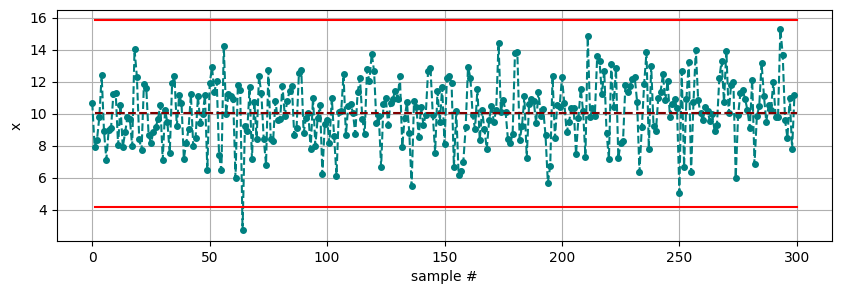

In [10]:
# control chart for combined data
plt.figure(figsize=(10,3))
plt.plot(x_combined,'--',marker='o', markersize=4, color='teal')
plt.plot([0,len(x_combined)], [UCL,UCL], color='red')
plt.plot([0,len(x_combined)], [LCL,LCL], color='red')
plt.plot([0,len(x_combined)], [mu,mu], '--', color='maroon')
plt.xlabel('sample #'), plt.ylabel('x')
plt.grid()
plt.show()